<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/Stats_All_metadata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# as of today
import datetime as dt
dt.date.today()
import os
import pandas as pd
from google.colab import drive
import csv
import os


Mounted at /content/drive


In [2]:
directory = '/content/drive/MyDrive/finalMetaFile'

final_file_list = ['metadata_jstor.csv', 'scopus_fixed_encoding.csv',
                   'elsevier_metadata.csv', 'metadata_semantic_scholar.csv',
                   'url1_ie_table_complete.csv', 'metadata_econlit.csv',
                   'SSRN_metadata.csv', 'metadata_repec.csv']


In [4]:

def get_column_names(file_list, directory):
  column_names = {}
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath,nrows=5)
    column_names[filename] = list(df.columns)
  return column_names

column_names = get_column_names(final_file_list, directory)

for filename, columns in column_names.items():
  print(f"Columns in {filename}:")
  print(*columns, sep=", ")
  print()


Columns in metadata_jstor.csv:
id, title, isPartOf, publicationYear, doi, docType, docSubType, provider, collection, datePublished, issueNumber, volumeNumber, url, creator, publisher, language, pageStart, pageEnd, placeOfPublication, wordCount, pageCount, file

Columns in scopus_fixed_encoding.csv:
Unnamed: 0, scopus_ID, abstract, coverDate, aggregationType, url, source-id, citedby-count, title, openaccess, subtypeDescription, publicationName, doi, abstract.1, language

Columns in elsevier_metadata.csv:
Unnamed: 0, id, type, title, abstract, keywords, authors, date, url, journal, downloaded

Columns in metadata_semantic_scholar.csv:
paper_id, title, venue, year, reference_count, citation_count, publication_date, publication_types, authors, s2_fields_of_study, fields_of_study, journal_name, mag_id, corpus_id, pub_med_id, pub_med_central_id, arxiv_id, dblp_id, acl_id, doi

Columns in url1_ie_table_complete.csv:
Unnamed: 0, id, title, author, sector, country, URL, pub_time, pub, open_acce

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


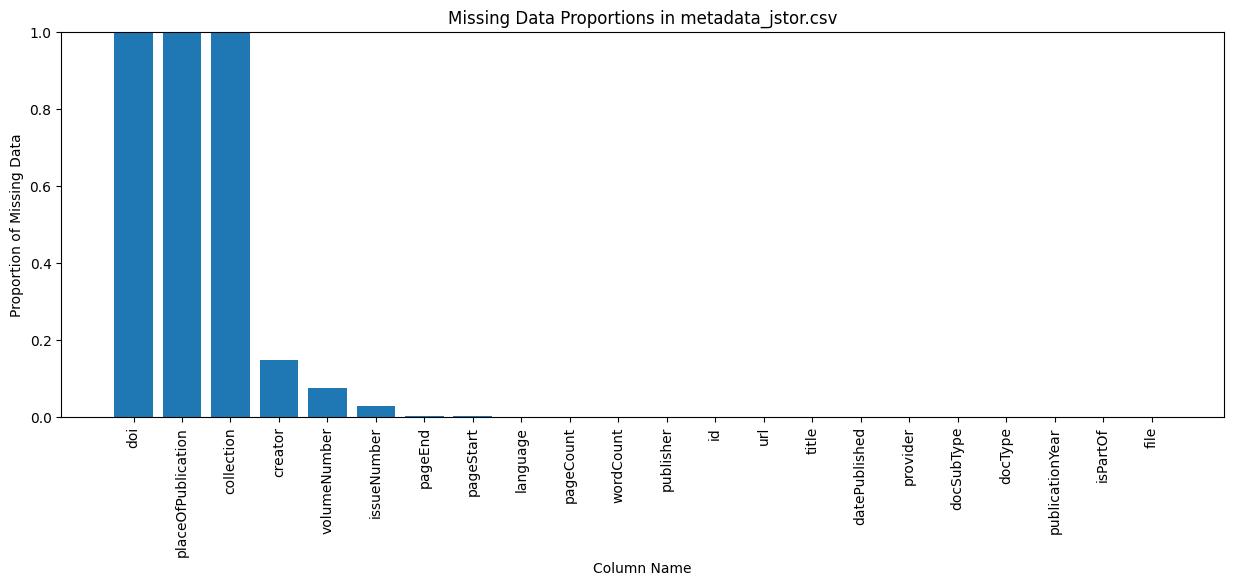

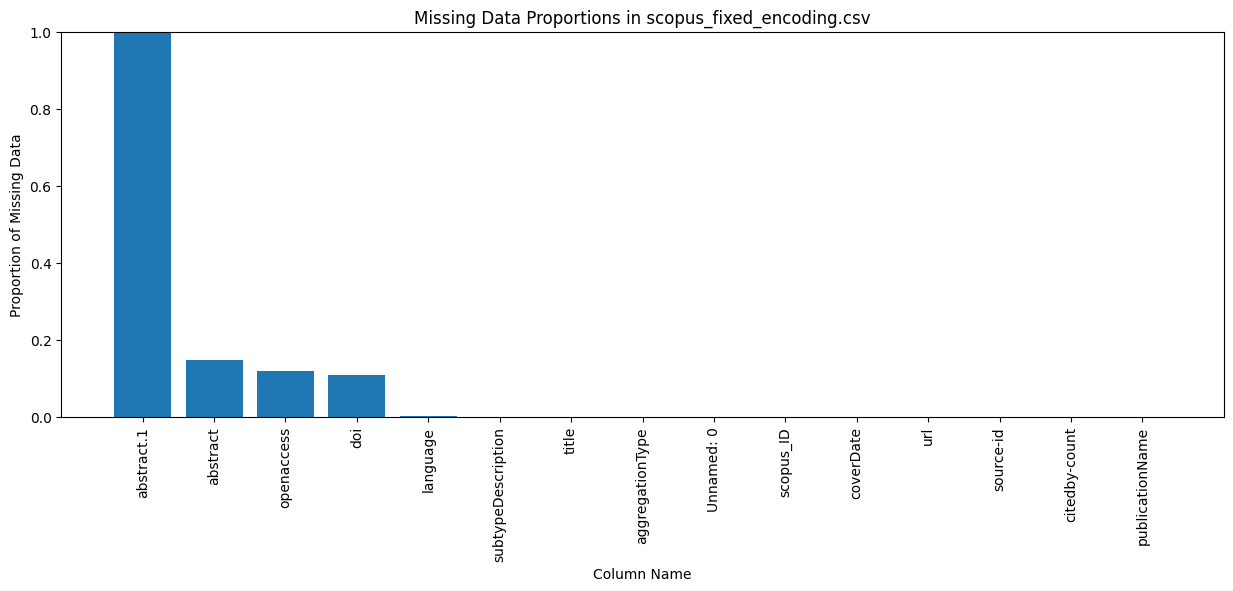

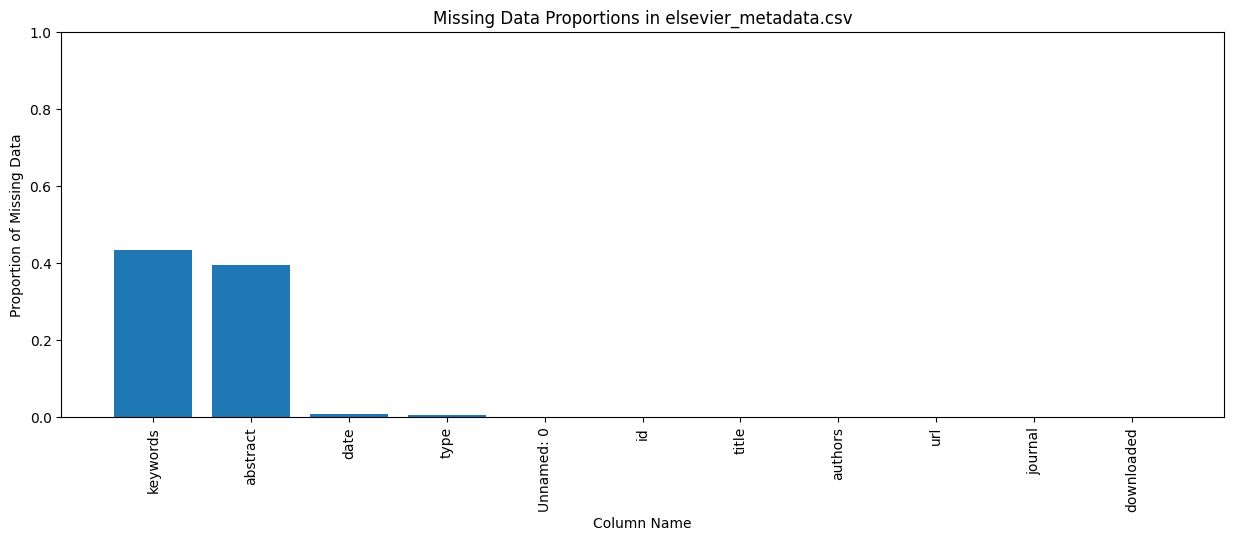

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


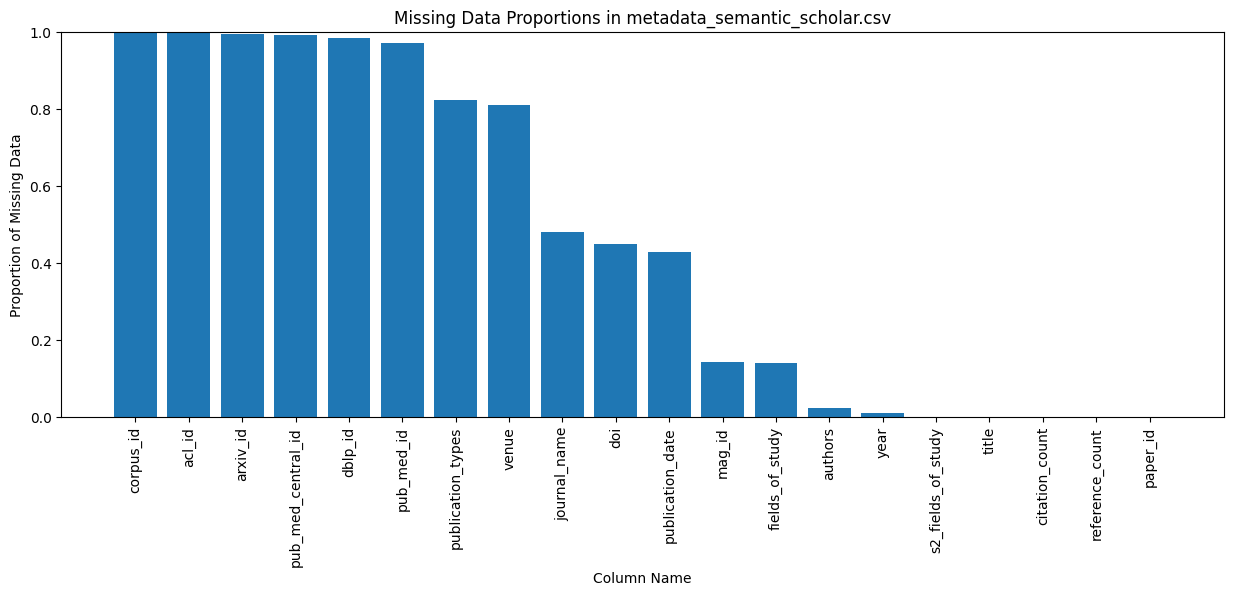

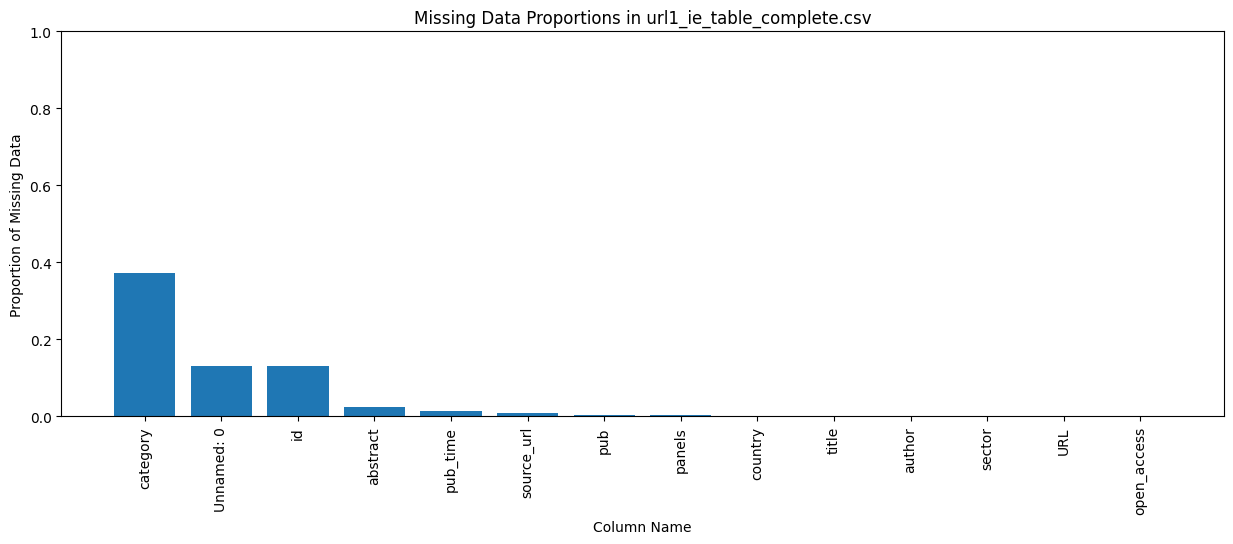

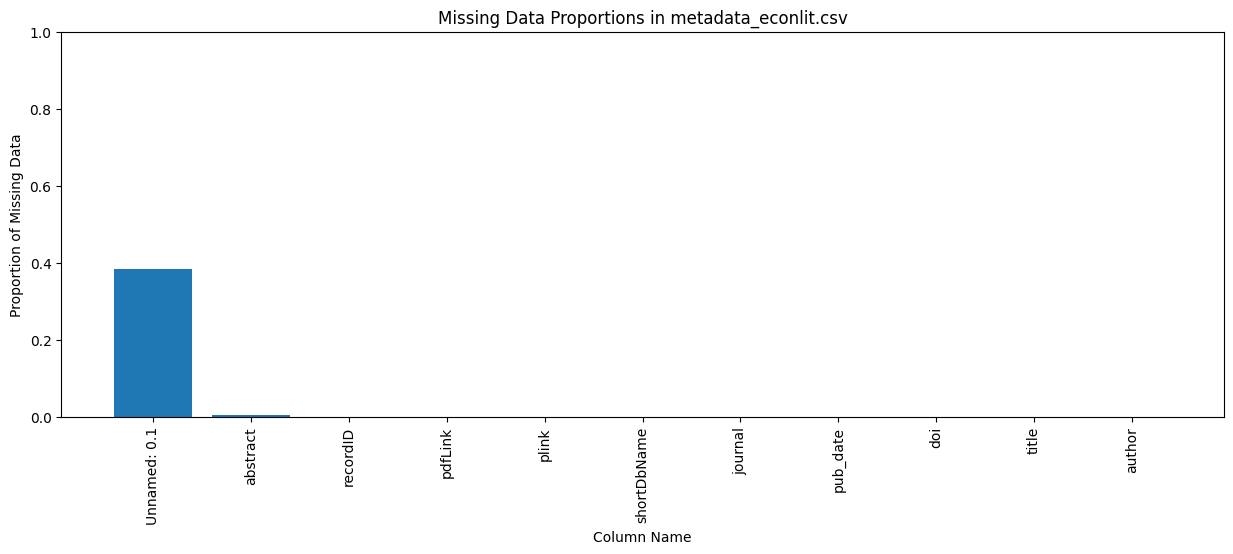

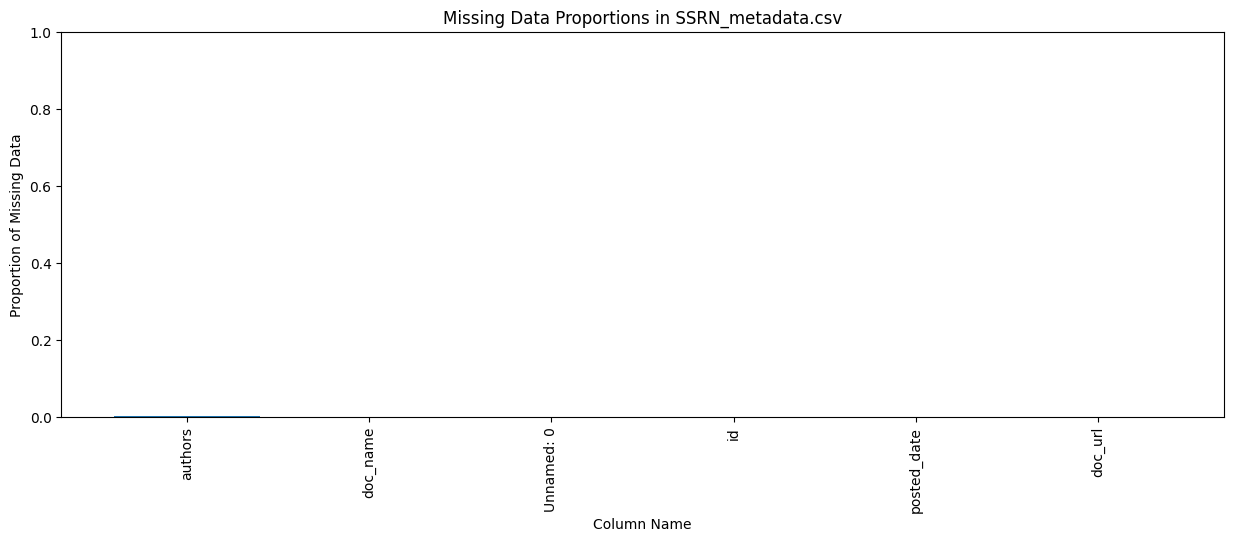

<ipython-input-5-7ffe240d4a03>:6: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


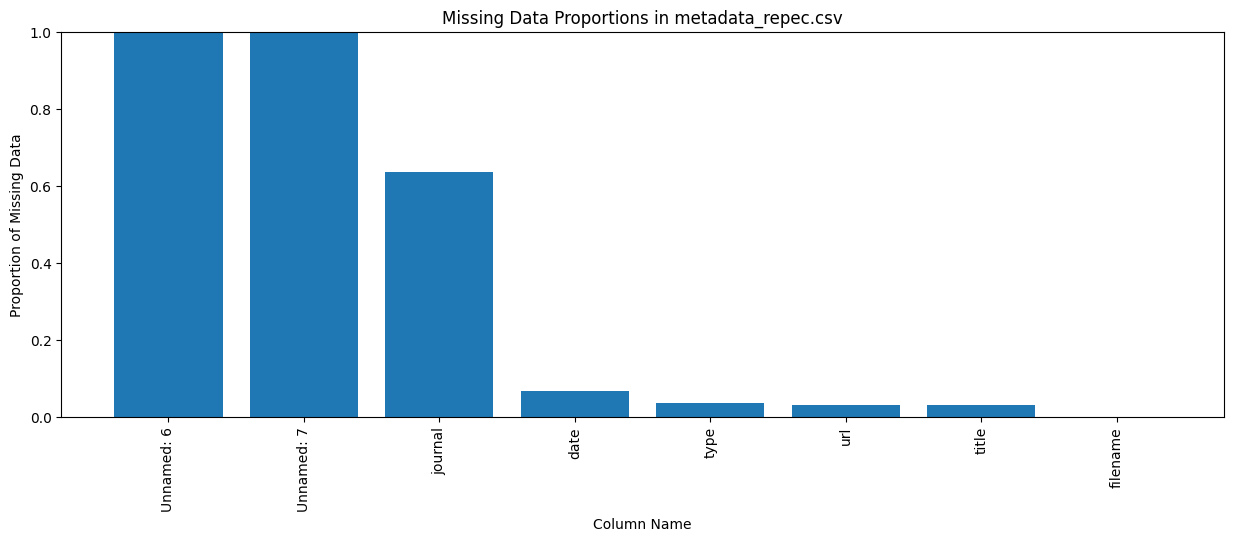

In [5]:

import matplotlib.pyplot as plt

def plot_missing_data_proportions(file_list, directory):
  for filename in file_list:
    filepath = os.path.join(directory, filename)
    df = pd.read_csv(filepath)
    missing_data_proportions = df.isna().mean().sort_values(ascending=False)

    plt.figure(figsize=(15, 5))
    plt.bar(missing_data_proportions.index, missing_data_proportions.values)
    plt.xlabel("Column Name")
    plt.xticks(rotation=90)
    plt.ylabel("Proportion of Missing Data")
    plt.ylim(0,1)
    plt.title(f"Missing Data Proportions in {filename}")
    plt.show()

plot_missing_data_proportions(final_file_list, directory)


In [ ]:
final_df = pd.DataFrame()

for filename in final_file_list:
  filepath = os.path.join(directory, filename)
  df = pd.read_csv(filepath)
  final_df = final_df.append(df, ignore_index=True)

final_df.to_csv(os.path.join(directory, 'combined_metadata.csv'), index=False)


<ipython-input-6-e8fbef95a4ce>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
<ipython-input-6-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-6-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-6-e8fbef95a4ce>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(df, ignore_index=True)
<ipython-input-6-e8fbef95a4ce>:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [ ]:

available_data_proportions = (1 - final_df.isna().mean()).sort_values(ascending=False)

plt.figure(figsize=(15, 5))
plt.bar(available_data_proportions.index, available_data_proportions.values)
plt.xlabel("Column Name")
plt.xticks(rotation=90)
plt.ylabel("Proportion of Available Data")
plt.ylim(0,1)
plt.title("Available Data Proportions in Combined Metadata")
plt.show()
